In [ ]:
# Scenario: Predicting Employee Salary Based on Years of Experience
# An HR analytics team wants to predict the salary of employees based on their years of experience.
# They collected salary data from current employees to build a predictive model.
# They assume a linear relationship:
# Salary=m×Experience+b
# Your task is to train a model and predict future salaries

Dataset:
    Experience_years  Salary_lpa
0                0.5         3.0
1                1.0         3.5
2                2.0         4.5
3                3.0         5.2
4                4.0         6.0
5                5.0         6.8
6                6.0         7.5
7                7.0         8.2
8                8.0         9.0
9               10.0        10.5
10              12.0        12.0

Slope (m): 0.762312925170068
Intercept (b): 2.8900680272108845

Actual vs Predicted Salary
Actual: 6.80, Predicted: 6.70
Actual: 3.00, Predicted: 3.27
Actual: 10.50, Predicted: 10.51

Mean Absolute Error: 0.1275963718820865
R2 Score: 0.9970343792256637

Predicted salary for 5 years experience: 6.70 LPA


D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


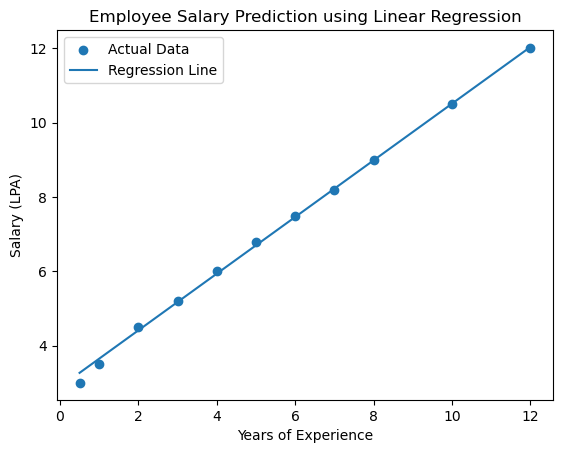

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Load dataset
df = pd.read_csv("salary_lpa.csv")

print("Dataset:")
print(df)

# Step 2: Define features and target
X = df[["Experience_years"]]   
y = df["Salary_lpa"]          

# Step 3: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Model parameters
print("\nSlope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

# Step 6: Predict test data
y_pred = model.predict(X_test)

print("\nActual vs Predicted Salary")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Step 7: Evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error:", mae)
print("R2 Score:", r2)

# Step 8: Predict new salary
new_experience = np.array([[5]])   
predicted_salary = model.predict(new_experience)

print(f"\nPredicted salary for 5 years experience: {predicted_salary[0]:.2f} LPA")

# Step 9: Visualization
plt.scatter(X, y, label="Actual Data")
plt.plot(X, model.predict(X), label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (LPA)")
plt.title("Employee Salary Prediction using Linear Regression")
plt.legend()
plt.show()